In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
column_names = [
    "Checking_Status", "Duration_Months", "Credit_History", "Purpose", "Credit_Amount",
    "Savings_Status", "Employment_Since", "Installment_Rate", "Personal_Status_Sex", 
    "Other_Debtors_Guarantors", "Residence_Since", "Property", "Age_Years", 
    "Other_Installment_Plans", "Housing", "Existing_Credits_Count", "Job", 
    "People_Maintenance_Count", "Telephone", "Foreign_Worker",
    # Indicator variables created for the categorical features during numeric conversion
    "Indicator_A21", "Indicator_A22", "Indicator_A23", "Indicator_A24", 
    "Credit_Risk" # This is the target variable (1=Good, 2=Bad)
]

file_path = "../data/german.data-numeric"

df = pd.read_csv(file_path,delim_whitespace=True, 
        header=None
    )

df.columns = column_names


C:\Users\ramis\AppData\Local\Temp\ipykernel_22672\9153090.py:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file_path,delim_whitespace=True,


In [19]:
from pathlib import Path

# Assuming the variable 'output_dir' holds the string path: '../reports/first/'
# Convert it explicitly to a Path object before joining.
output_dir = Path('../reports/first/')

In [3]:
df

,Checking_Status,Duration_Months,Credit_History,Purpose,Credit_Amount,Savings_Status,Employment_Since,Installment_Rate,Personal_Status_Sex,Other_Debtors_Guarantors,...,Existing_Credits_Count,Job,People_Maintenance_Count,Telephone,Foreign_Worker,Indicator_A21,Indicator_A22,Indicator_A23,Indicator_A24,Credit_Risk
0,1,6,4,12,5,5,3,4,1,67,...,0,0,1,0,0,1,0,0,1,1
1,2,48,2,60,1,3,2,2,1,22,...,0,0,1,0,0,1,0,0,1,2
2,4,12,4,21,1,4,3,3,1,49,...,0,0,1,0,0,1,0,1,0,1
3,1,42,2,79,1,4,3,4,2,45,...,0,0,0,0,0,0,0,0,1,1
4,1,24,3,49,1,3,3,4,4,53,...,1,0,1,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,12,2,17,1,4,2,4,1,31,...,0,0,1,0,0,1,0,1,0,1
996,1,30,2,39,1,3,1,4,2,40,...,0,1,1,0,0,1,0,0,0,1
997,4,12,2,8,1,5,3,4,3,38,...,0,0,1,0,0,1,0,0,1,1
998,1,45,2,18,1,3,3,4,4,23,...,0,0,1,0,0,0,0,0,1,2


In [4]:
df.shape

(1000, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Checking_Status           1000 non-null   int64
 1   Duration_Months           1000 non-null   int64
 2   Credit_History            1000 non-null   int64
 3   Purpose                   1000 non-null   int64
 4   Credit_Amount             1000 non-null   int64
 5   Savings_Status            1000 non-null   int64
 6   Employment_Since          1000 non-null   int64
 7   Installment_Rate          1000 non-null   int64
 8   Personal_Status_Sex       1000 non-null   int64
 9   Other_Debtors_Guarantors  1000 non-null   int64
 10  Residence_Since           1000 non-null   int64
 11  Property                  1000 non-null   int64
 12  Age_Years                 1000 non-null   int64
 13  Other_Installment_Plans   1000 non-null   int64
 14  Housing                   1000 non-null  

In [7]:
print("--- Data Quality and Statistics ---")
print(f"Dataset Shape: {df.shape}")
print("\nMissing Values Check (Should be 0 if clean):")
df.isnull().sum().sum()

--- Data Quality and Statistics ---
Dataset Shape: (1000, 25)

Missing Values Check (Should be 0 if clean):


np.int64(0)

In [8]:

print("\nDescriptive Statistics for Numerical Features:")
print(df[['Credit_Amount', 'Duration_Months', 'Age_Years', 'Credit_Risk']].describe())


Descriptive Statistics for Numerical Features:
       Credit_Amount  Duration_Months    Age_Years  Credit_Risk
count    1000.000000      1000.000000  1000.000000  1000.000000
mean        2.105000        20.903000     1.155000     1.300000
std         1.580023        12.058814     0.362086     0.458487
min         1.000000         4.000000     1.000000     1.000000
25%         1.000000        12.000000     1.000000     1.000000
50%         1.000000        18.000000     1.000000     1.000000
75%         3.000000        24.000000     1.000000     2.000000
max         5.000000        72.000000     2.000000     2.000000


Saved plot: eda_target_distribution.png


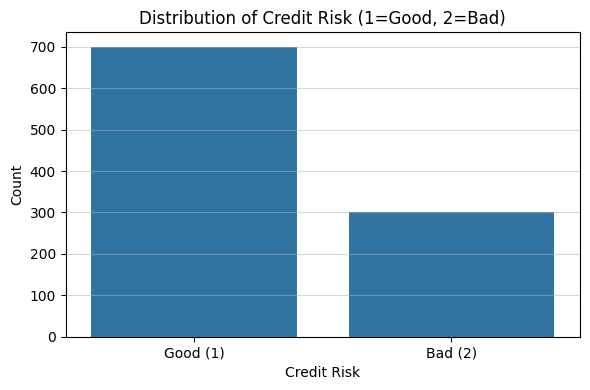

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Credit_Risk', data=df)
plt.title('Distribution of Credit Risk (1=Good, 2=Bad)')
plt.xlabel('Credit Risk')
plt.ylabel('Count')
plt.xticks([0, 1], ['Good (1)', 'Bad (2)'])
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.savefig('../reports/first/eda_target_distribution.png')
print("Saved plot: eda_target_distribution.png")

Saved plot: eda_key_feature_distributions.png


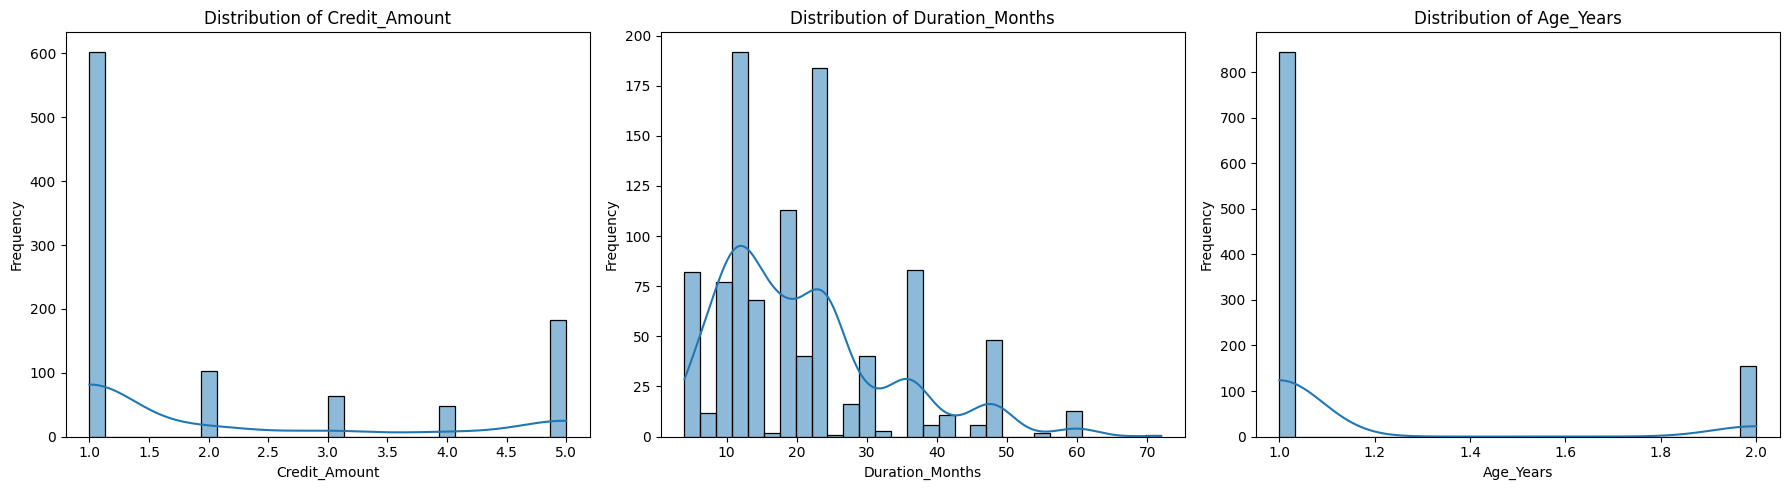

In [13]:
key_features = ['Credit_Amount', 'Duration_Months', 'Age_Years']
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(key_features):
    sns.histplot(df[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.savefig('../reports/first/eda_key_feature_distributions.png')
print("Saved plot: eda_key_feature_distributions.png")

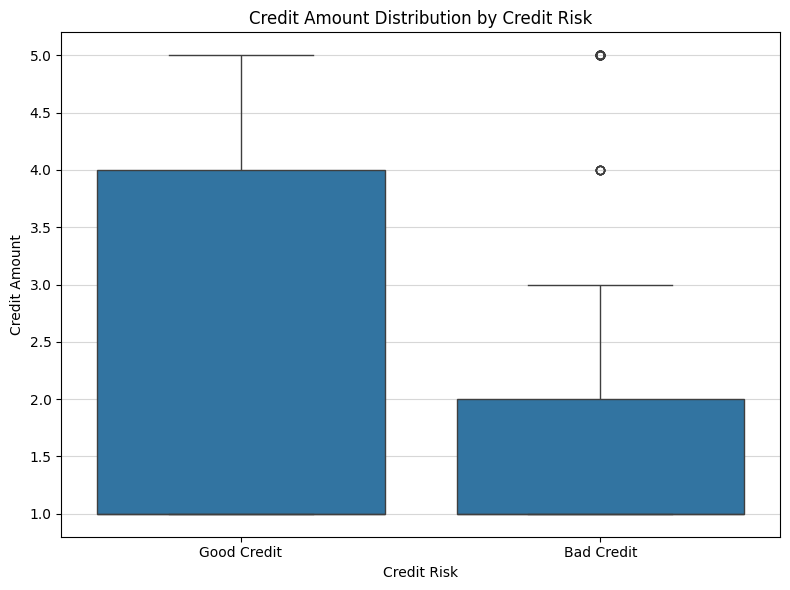

In [14]:
df['Credit_Risk_Label'] = df['Credit_Risk'].map({1: 'Good Credit', 2: 'Bad Credit'})

# Plot Credit Amount vs. Target
plt.figure(figsize=(8, 6))
sns.boxplot(x='Credit_Risk_Label', y='Credit_Amount', data=df)
plt.title('Credit Amount Distribution by Credit Risk')
plt.xlabel('Credit Risk')
plt.ylabel('Credit Amount')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.savefig('../reports/first/eda_credit_amount_vs_target.png')

Saved plot: eda_duration_vs_target.png


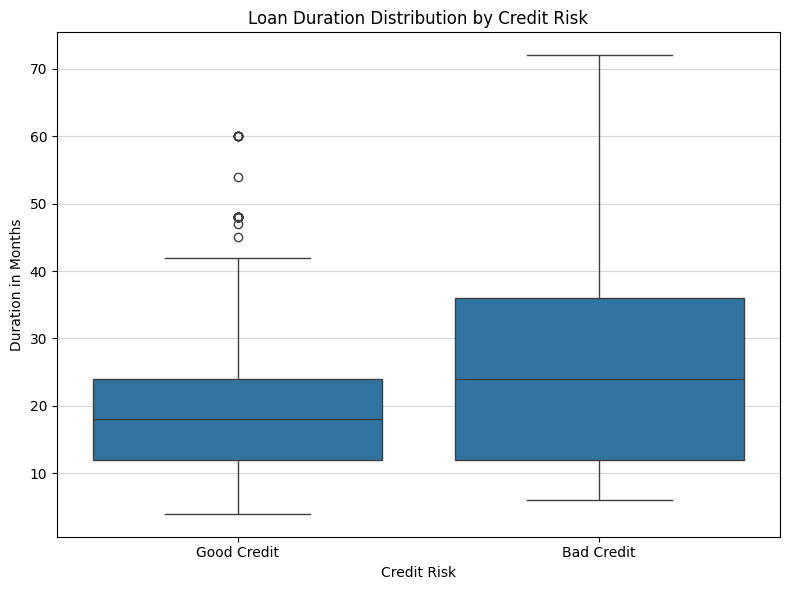

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Credit_Risk_Label', y='Duration_Months', data=df)
plt.title('Loan Duration Distribution by Credit Risk')
plt.xlabel('Credit Risk')
plt.ylabel('Duration in Months')
plt.grid(axis='y', alpha=0.5)
plt.tight_layout()
plt.savefig('../reports/first/eda_duration_vs_target.png')
print("Saved plot: eda_duration_vs_target.png")

Saved plot: eda_purpose_vs_target.png


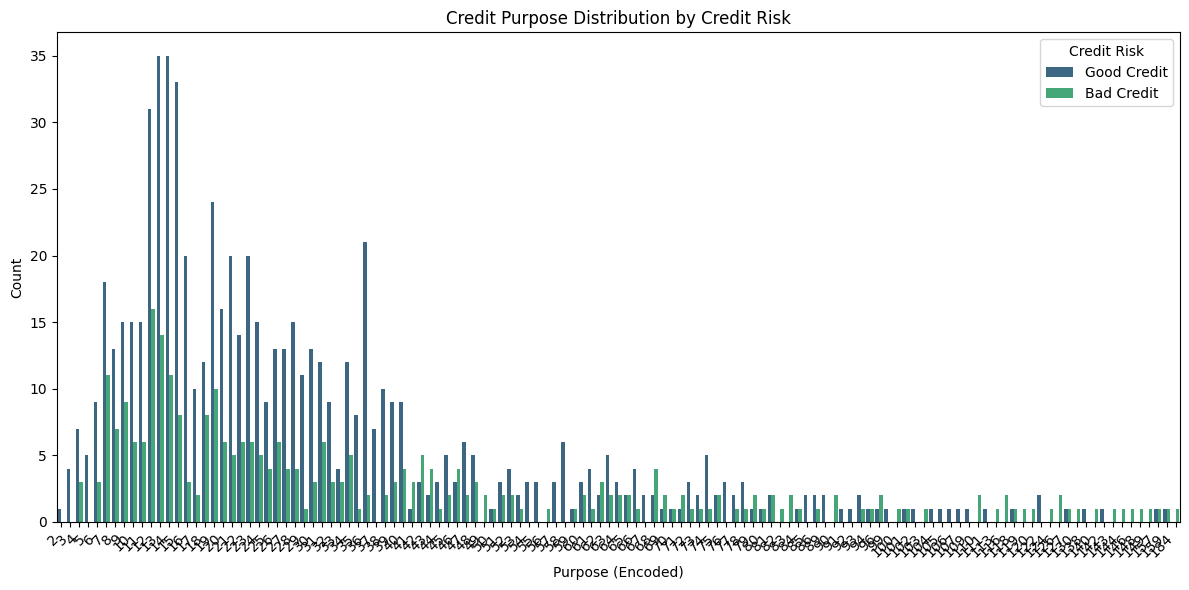

In [21]:
plt.figure(figsize=(12, 6))
# Using Credit_Risk_Label (created in the previous step) for readability
sns.countplot(x='Purpose', hue='Credit_Risk_Label', data=df, palette='viridis')
plt.title('Credit Purpose Distribution by Credit Risk')
plt.xlabel('Purpose (Encoded)')
plt.ylabel('Count')
plt.legend(title='Credit Risk')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig(output_dir / 'eda_purpose_vs_target.png')
print("Saved plot: eda_purpose_vs_target.png")

C:\Users\ramis\AppData\Local\Temp\ipykernel_22672\4135828558.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=target_corr.index, y=target_corr.values, palette='RdYlGn')


Saved plot: ..\reports\first\eda_target_correlation_bar.png


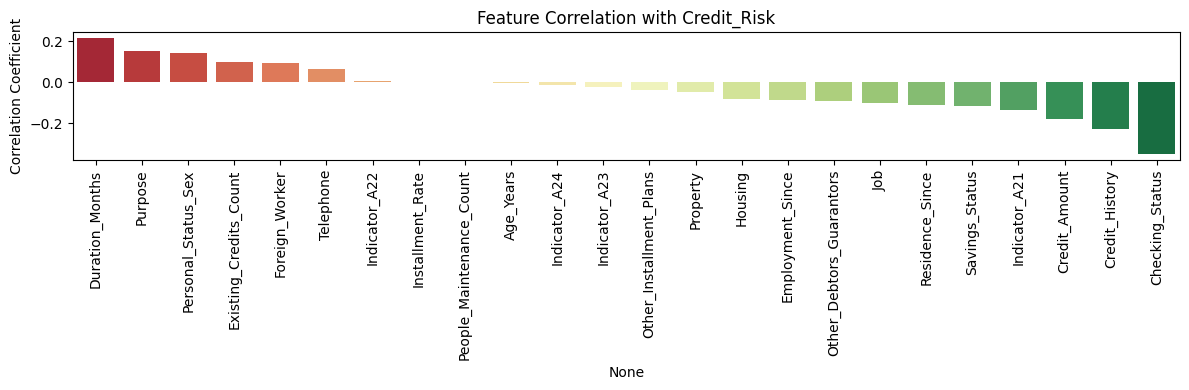

In [20]:
correlation_df = df.drop(columns=['Credit_Risk_Label'])
corr_matrix = correlation_df.corr()

plt.figure(figsize=(12, 4))
target_corr = corr_matrix['Credit_Risk'].sort_values(ascending=False).drop('Credit_Risk')
sns.barplot(x=target_corr.index, y=target_corr.values, palette='RdYlGn')
plt.title('Feature Correlation with Credit_Risk')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(output_dir / 'eda_target_correlation_bar.png')
print(f"Saved plot: {output_dir / 'eda_target_correlation_bar.png'}")

In [22]:
column_name = 'Credit_Amount'

# 1. Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df[column_name].quantile(0.25)
Q3 = df[column_name].quantile(0.75)

# 2. Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# 3. Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 4. Identify the actual outlier data points
outliers = df[
    (df[column_name] < lower_bound) | (df[column_name] > upper_bound)
]

print(f"\n--- Outlier Detection for: {column_name} ---")
print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Lower Bound: {lower_bound:.2f}, Upper Bound: {upper_bound:.2f}")
print(f"\nTotal number of outliers found: {len(outliers)}")
print("First 5 outlier records:")
print(outliers[['Credit_Amount', 'Duration_Months', 'Credit_Risk_Label']].head())


--- Outlier Detection for: Credit_Amount ---
Q1: 1.00, Q3: 3.00, IQR: 2.00
Lower Bound: -2.00, Upper Bound: 6.00

Total number of outliers found: 0
First 5 outlier records:
Empty DataFrame
Columns: [Credit_Amount, Duration_Months, Credit_Risk_Label]
Index: []
